# Gaussian process example

**Reference(s):**
- N. de Freitas: Gaussian Processes (UBC, CPSC540, 2013)
    - [Lecture 1: Introduction to Gaussian Processes](https://www.youtube.com/watch?v=4vGiHC35j9s)
    - [Lecture 2: Gaussian Processes](https://www.youtube.com/watch?v=MfHKW5z-OOA)
    - http://www.cs.ubc.ca/~nando/540-2013/lectures/gp.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    f = np.sin(0.9*x).flatten()
    return f

In [4]:
def kernel(a, b, l=0.1): 
    squared_distance = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-0.5 * (1/l) * squared_distance)

In [9]:
ndatapts = 10

In [10]:
noise_std = 0.1

## Truth model

In [14]:
x_truth_grid = np.linspace(-5, 5, 100)
y_truth = f(x_truth_grid)

## Data

Generate data

In [11]:
x = np.random.uniform(-5, 5, size=(ndatapts,1))
y = f(x) + noise_std*np.random.randn(ndatapts)

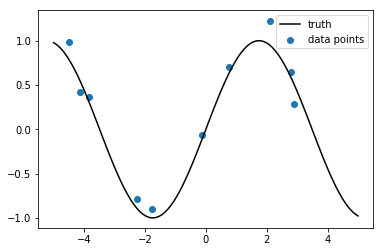

In [16]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='data points')
ax.plot(x_truth_grid, y_truth, c='k', label='truth')
ax.legend()

In [17]:
K = kernel(x, x)

Cholesky decomposition

In [ ]:
L = np.linalg.cholesky(K + s*np.eye(n_training))

New points

In [ ]:
xgrid = np.linspace(-5, 5, n_t).reshape(-1,1)

In [ ]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y)) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)
